In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

In [2]:
df=pd.read_csv("titanic.csv") 


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# CLEANING DATA

In [5]:
#Mengubah tipe data train
df['PassengerId']=df['PassengerId'].astype(str)
df['Survived']=df['Survived'].astype(str)
df['Pclass']=df['Pclass'].astype(str)
df['SibSp']=df['SibSp'].astype(str)
df['Parch']=df['Parch'].astype(str)


In [6]:
#Melihat banyaknya missing value train
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#Imputasi variabel yang memiliki missing banyak >1/3
df=df.drop(['Cabin'],axis=1)  #axis 1 merupakan kolom, kalau axis 0 itu baris


c:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


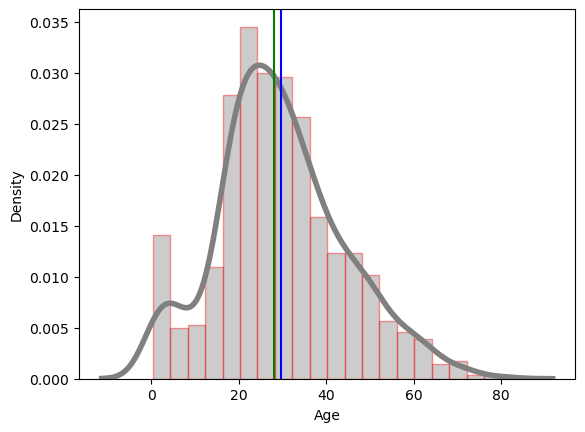

In [8]:
#Mencari memakai mean atau median (data train)
sns.distplot(df['Age'], hist=True, kde=True,
           color='grey',
          hist_kws={'edgecolor':'red'},
            kde_kws={'linewidth':4})
plt.axvline(df['Age'].mean(), color='blue')
plt.axvline(df['Age'].median(), color='green')

In [9]:
#mengisi missing value numerik menggunakan median
df['Age']=df['Age'].fillna(df['Age'].median())


In [10]:
#Mengisi missing value kategorik data train
df['Embarked']=df['Embarked'].fillna(st.mode(df['Embarked']))

In [11]:
#Menghapus Outlier
from scipy import stats
z=np.abs(stats.zscore(df._get_numeric_data()))

#mendapatkan data yang tidak outlier pada semua variabel
df1 = df[(z<3).all(axis=1)]
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


# TRANSFORMASI DATA

# Recode

In [12]:
df1.describe(include=[object])

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked
count,864,864,864,864,864,864,864,864,864
unique,864,2,3,864,2,7,7,667,3
top,1,0,3,"Braund, Mr. Owen Harris",male,0,0,CA. 2343,S
freq,1,537,489,1,562,589,664,7,634


In [13]:
from sklearn.preprocessing import LabelEncoder
#Recode Sex 1: Male, 0:Female
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df1['Sex'])

# removing the column 'gender' from df
# as it is of no use now.
df1.drop('Sex', axis=1, inplace=True)
 
# Appending the array to our dataFrame
# with column name 'gender'
df1['Sex'] = label
 
# printing Dataframe
df1

C:\Users\DELL\AppData\Local\Temp\ipykernel_6864\2971217068.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop('Sex', axis=1, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6864\2971217068.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Sex'] = label


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C,1


In [14]:
#Recode Embarked 0: C, 1:Q, 2:S
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df1['Embarked'])

# removing the column 'gender' from df
# as it is of no use now.
df1.drop('Embarked', axis=1, inplace=True)
 
# Appending the array to our dataFrame
# with column name 'gender'
df1['Embarked'] = label
 
# printing Dataframe
df1

C:\Users\DELL\AppData\Local\Temp\ipykernel_6864\836300052.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop('Embarked', axis=1, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6864\836300052.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Embarked'] = label


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,2
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,1,2
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,0,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,0,2
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,1,0


# Visualisasi Data 

c:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

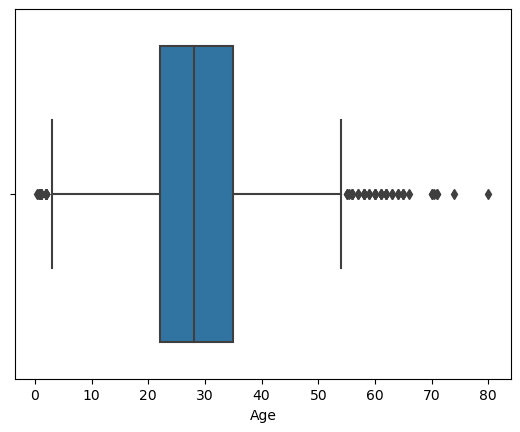

In [15]:
sns.boxplot(df['Age'])

c:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

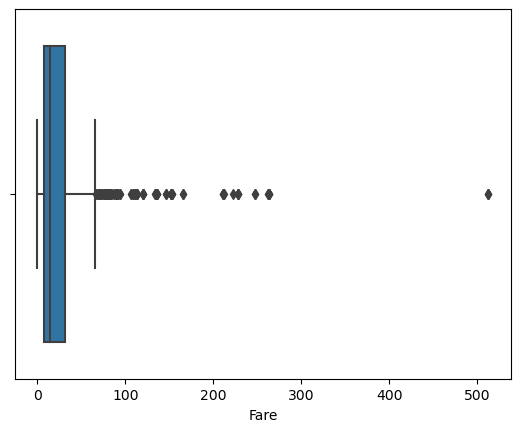

In [16]:
sns.boxplot(df['Fare'])

<AxesSubplot:>

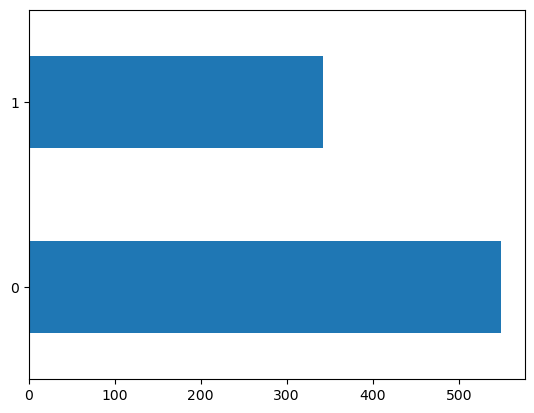

In [17]:
df['Survived'].value_counts().plot(kind='barh')

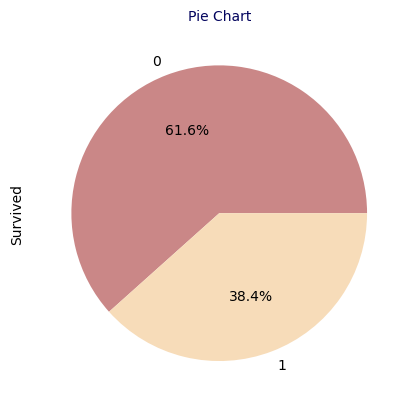

In [18]:
colors = ('#CA8787', '#F7DCB9')

Type = df['Survived'].value_counts()
Type.plot.pie(autopct = '%.1f%%', colors = colors) #autipct buat ngatur koma yang persenan
plt.title('Pie Chart', fontsize=10, color='#03045e')
plt.show()

# SVM

In [20]:
#Import scikit-learn dataset library
from sklearn import datasets

# Import train_test_split function
from sklearn.model_selection import train_test_split

#Import svm model
from sklearn import svm

# Import for matrix confussion
from sklearn.metrics import confusion_matrix

# Import for classification report
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [21]:
target = df1['Survived']
features = df1.drop(['PassengerId','Survived','Name','Ticket'],axis=1)
features

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,3,22.0,1,0,7.2500,1,2
1,1,38.0,1,0,71.2833,0,0
2,3,26.0,0,0,7.9250,0,2
3,1,35.0,1,0,53.1000,0,2
4,3,35.0,0,0,8.0500,1,2
...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,2
887,1,19.0,0,0,30.0000,0,2
888,3,28.0,1,2,23.4500,0,2
889,1,26.0,0,0,30.0000,1,0


In [22]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25,random_state=123) # 75% training and 25% test

###### 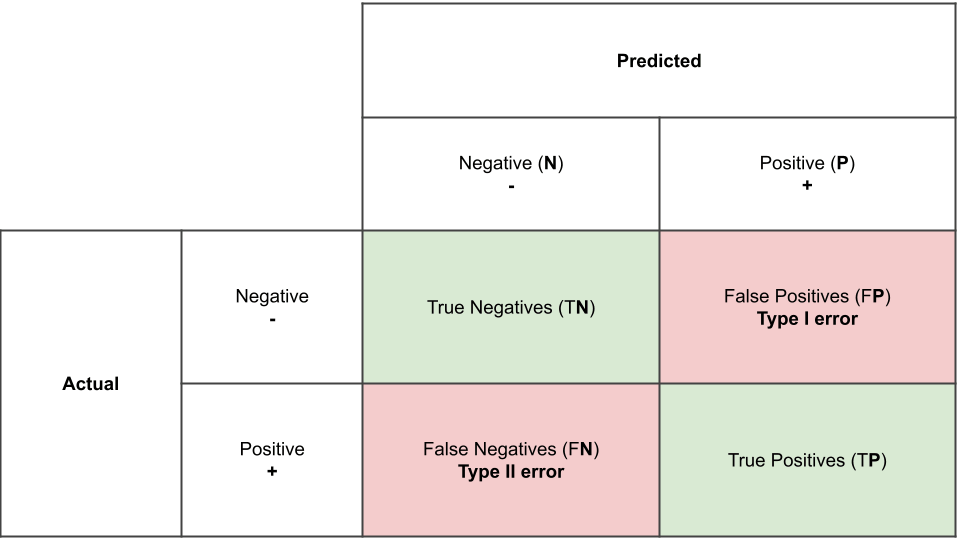


##### 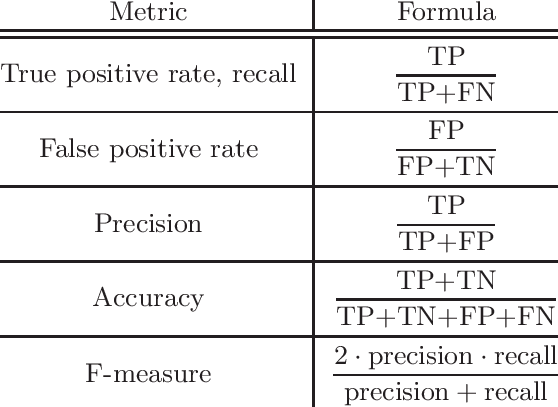

# KERNEL LINEAR

In [23]:
# Create a SVM Classifier
clf_linear = svm.SVC(kernel='linear', random_state=123)
# Train the model using the training sets
clf_linear.fit(X_train, y_train)

# Predict the response for the training dataset
y_pred_train = clf_linear.predict(X_train)
# Predict the response for the test dataset
y_predlin = clf_linear.predict(X_test)

# Calculate accuracy for the training data
accuracy_train = accuracy_score(y_train, y_pred_train)
# Calculate accuracy for the test data
accuracy_test = accuracy_score(y_test, y_predlin)

# Print the accuracy for training and test data
print("Training Data Accuracy:", accuracy_train)
print("Test Data Accuracy:", accuracy_test)

# Print the confusion matrix for the test data
print(confusion_matrix(y_test, y_predlin))
# Print the classification report for the test data
print(classification_report(y_test, y_predlin))


Training Data Accuracy: 0.7700617283950617
Test Data Accuracy: 0.8240740740740741
[[118  18]
 [ 20  60]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       136
           1       0.77      0.75      0.76        80

    accuracy                           0.82       216
   macro avg       0.81      0.81      0.81       216
weighted avg       0.82      0.82      0.82       216



#  LINEAR C=1, gamma=0.1

In [22]:
#Create a svm Classifier
clf_linear1 = svm.SVC(class_weight=None, C=1, gamma=0.1, kernel='linear', random_state=123)
#Train the model using the training sets
clf_linear1.fit(X_train, y_train)
# Predict the response for the training dataset
y_pred_train1 = clf_linear1.predict(X_train)
# Predict the response for the test dataset
y_predlin1 = clf_linear1.predict(X_test)

# Calculate accuracy for the training data
accuracy_train1 = accuracy_score(y_train, y_pred_train1)
# Calculate accuracy for the test data
accuracy_test1 = accuracy_score(y_test, y_predlin1)

# Print the accuracy for training and test data
print("Training Data Accuracy:", accuracy_train1)
print("Test Data Accuracy:", accuracy_test1)

print(confusion_matrix(y_test, y_predlin1))
print(classification_report(y_test, y_predlin1))

Training Data Accuracy: 0.7700617283950617
Test Data Accuracy: 0.8240740740740741
[[118  18]
 [ 20  60]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       136
           1       0.77      0.75      0.76        80

    accuracy                           0.82       216
   macro avg       0.81      0.81      0.81       216
weighted avg       0.82      0.82      0.82       216



In [23]:
#Create a svm Classifier
clf_linear2 = svm.SVC(class_weight='balanced', C=1, gamma=0.1, kernel='linear', random_state=123)
#Train the model using the training sets
clf_linear2.fit(X_train, y_train)

# Predict the response for the training dataset
y_pred_train2 = clf_linear2.predict(X_train)
# Predict the response for the test dataset
y_predlin2 = clf_linear2.predict(X_test)

# Calculate accuracy for the training data
accuracy_train2 = accuracy_score(y_train, y_pred_train2)
# Calculate accuracy for the test data
accuracy_test2 = accuracy_score(y_test, y_predlin2)

# Print the accuracy for training and test data
print("Training Data Accuracy:", accuracy_train2)
print("Test Data Accuracy:", accuracy_test2)

print(confusion_matrix(y_test, y_predlin2))
print(classification_report(y_test, y_predlin2))

Training Data Accuracy: 0.7716049382716049
Test Data Accuracy: 0.8240740740740741
[[116  20]
 [ 18  62]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       136
           1       0.76      0.78      0.77        80

    accuracy                           0.82       216
   macro avg       0.81      0.81      0.81       216
weighted avg       0.83      0.82      0.82       216



# LINEAR C=1, gamma=0.2

In [24]:
#Create a svm Classifier
clf_linear3 = svm.SVC(class_weight=None, C=1, gamma=0.2, kernel='linear', random_state=123)
#Train the model using the training sets
clf_linear3.fit(X_train, y_train)

# Predict the response for the training dataset
y_pred_train3 = clf_linear3.predict(X_train)
# Predict the response for the test dataset
y_predlin3 = clf_linear3.predict(X_test)

# Calculate accuracy for the training data
accuracy_train3 = accuracy_score(y_train, y_pred_train3)
# Calculate accuracy for the test data
accuracy_test3 = accuracy_score(y_test, y_predlin3)

# Print the accuracy for training and test data
print("Training Data Accuracy:", accuracy_train3)
print("Test Data Accuracy:", accuracy_test3)

print(confusion_matrix(y_test, y_predlin3))
print(classification_report(y_test, y_predlin3))

Training Data Accuracy: 0.7700617283950617
Test Data Accuracy: 0.8240740740740741
[[118  18]
 [ 20  60]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       136
           1       0.77      0.75      0.76        80

    accuracy                           0.82       216
   macro avg       0.81      0.81      0.81       216
weighted avg       0.82      0.82      0.82       216



In [25]:
#Create a svm Classifier
clf_linear4 = svm.SVC(class_weight='balanced', C=1, gamma=0.2, kernel='linear', random_state=123)
#Train the model using the training sets
clf_linear4.fit(X_train, y_train)

# Predict the response for the training dataset
y_pred_train4 = clf_linear4.predict(X_train)
# Predict the response for the test dataset
y_predlin4 = clf_linear4.predict(X_test)

# Calculate accuracy for the training data
accuracy_train4 = accuracy_score(y_train, y_pred_train4)
# Calculate accuracy for the test data
accuracy_test4 = accuracy_score(y_test, y_predlin4)

# Print the accuracy for training and test data
print("Training Data Accuracy:", accuracy_train4)
print("Test Data Accuracy:", accuracy_test4)

print(confusion_matrix(y_test, y_predlin4))
print(classification_report(y_test, y_predlin4))

Training Data Accuracy: 0.7716049382716049
Test Data Accuracy: 0.8240740740740741
[[116  20]
 [ 18  62]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       136
           1       0.76      0.78      0.77        80

    accuracy                           0.82       216
   macro avg       0.81      0.81      0.81       216
weighted avg       0.83      0.82      0.82       216



# LINEAR C=2, gamma=0.1

In [26]:
#Create a svm Classifier
clf_linear5 = svm.SVC(class_weight=None, C=2, gamma=0.1, kernel='linear', random_state=123)
#Train the model using the training sets
clf_linear5.fit(X_train, y_train)

# Predict the response for the training dataset
y_pred_train5 = clf_linear5.predict(X_train)
# Predict the response for the test dataset
y_predlin5 = clf_linear5.predict(X_test)

# Calculate accuracy for the training data
accuracy_train5 = accuracy_score(y_train, y_pred_train5)
# Calculate accuracy for the test data
accuracy_test5 = accuracy_score(y_test, y_predlin5)

# Print the accuracy for training and test data
print("Training Data Accuracy:", accuracy_train5)
print("Test Data Accuracy:", accuracy_test5)

print(confusion_matrix(y_test, y_predlin5))
print(classification_report(y_test, y_predlin5))

Training Data Accuracy: 0.7731481481481481
Test Data Accuracy: 0.8287037037037037
[[119  17]
 [ 20  60]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       136
           1       0.78      0.75      0.76        80

    accuracy                           0.83       216
   macro avg       0.82      0.81      0.81       216
weighted avg       0.83      0.83      0.83       216



In [27]:
#Create a svm Classifier
clf_linear6 = svm.SVC(class_weight='balanced', C=2, gamma=0.1, kernel='linear', random_state=123)
#Train the model using the training sets
clf_linear6.fit(X_train, y_train)

# Predict the response for the training dataset
y_pred_train6 = clf_linear6.predict(X_train)
# Predict the response for the test dataset
y_predlin6 = clf_linear6.predict(X_test)

# Calculate accuracy for the training data
accuracy_train6 = accuracy_score(y_train, y_pred_train6)
# Calculate accuracy for the test data
accuracy_test6 = accuracy_score(y_test, y_predlin6)

# Print the accuracy for training and test data
print("Training Data Accuracy:", accuracy_train6)
print("Test Data Accuracy:", accuracy_test6)

print(confusion_matrix(y_test, y_predlin6))
print(classification_report(y_test, y_predlin6))

Training Data Accuracy: 0.7716049382716049
Test Data Accuracy: 0.8240740740740741
[[116  20]
 [ 18  62]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       136
           1       0.76      0.78      0.77        80

    accuracy                           0.82       216
   macro avg       0.81      0.81      0.81       216
weighted avg       0.83      0.82      0.82       216



# LINEAR C=2, gamma=0.2

In [28]:
#Create a svm Classifier
clf_linear7 = svm.SVC(class_weight=None, C=2, gamma=0.2, kernel='linear', random_state=123)
#Train the model using the training sets
clf_linear7.fit(X_train, y_train)

# Predict the response for the training dataset
y_pred_train7 = clf_linear7.predict(X_train)
# Predict the response for the test dataset
y_predlin7 = clf_linear7.predict(X_test)

# Calculate accuracy for the training data
accuracy_train7 = accuracy_score(y_train, y_pred_train7)
# Calculate accuracy for the test data
accuracy_test7 = accuracy_score(y_test, y_predlin7)

# Print the accuracy for training and test data
print("Training Data Accuracy:", accuracy_train7)
print("Test Data Accuracy:", accuracy_test7)

print(confusion_matrix(y_test, y_predlin7))
print(classification_report(y_test, y_predlin7))

Training Data Accuracy: 0.7731481481481481
Test Data Accuracy: 0.8287037037037037
[[119  17]
 [ 20  60]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       136
           1       0.78      0.75      0.76        80

    accuracy                           0.83       216
   macro avg       0.82      0.81      0.81       216
weighted avg       0.83      0.83      0.83       216



In [29]:
#Create a svm Classifier
clf_linear8 = svm.SVC(class_weight='balanced', C=2, gamma=0.2, kernel='linear', random_state=123)
#Train the model using the training sets
clf_linear8.fit(X_train, y_train)

# Predict the response for the training dataset
y_pred_train8 = clf_linear8.predict(X_train)
# Predict the response for the test dataset
y_predlin8 = clf_linear8.predict(X_test)

# Calculate accuracy for the training data
accuracy_train8 = accuracy_score(y_train, y_pred_train8)
# Calculate accuracy for the test data
accuracy_test8 = accuracy_score(y_test, y_predlin8)

# Print the accuracy for training and test data
print("Training Data Accuracy:", accuracy_train8)
print("Test Data Accuracy:", accuracy_test8)

print(confusion_matrix(y_test, y_predlin8))
print(classification_report(y_test, y_predlin8))

Training Data Accuracy: 0.7716049382716049
Test Data Accuracy: 0.8240740740740741
[[116  20]
 [ 18  62]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       136
           1       0.76      0.78      0.77        80

    accuracy                           0.82       216
   macro avg       0.81      0.81      0.81       216
weighted avg       0.83      0.82      0.82       216



# C=3, gamma=0.1

In [30]:
#Create a svm Classifier
clf_linear9 = svm.SVC(class_weight=None, C=3, gamma=0.1, kernel='linear', random_state=123)
#Train the model using the training sets
clf_linear9.fit(X_train, y_train)

# Predict the response for the training dataset
y_pred_train9 = clf_linear9.predict(X_train)
# Predict the response for the test dataset
y_predlin9 = clf_linear9.predict(X_test)

# Calculate accuracy for the training data
accuracy_train9 = accuracy_score(y_train, y_pred_train9)
# Calculate accuracy for the test data
accuracy_test9 = accuracy_score(y_test, y_predlin9)

# Print the accuracy for training and test data
print("Training Data Accuracy:", accuracy_train9)
print("Test Data Accuracy:", accuracy_test9)

print(confusion_matrix(y_test, y_predlin9))
print(classification_report(y_test, y_predlin9))

Training Data Accuracy: 0.7731481481481481
Test Data Accuracy: 0.8287037037037037
[[119  17]
 [ 20  60]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       136
           1       0.78      0.75      0.76        80

    accuracy                           0.83       216
   macro avg       0.82      0.81      0.81       216
weighted avg       0.83      0.83      0.83       216



In [31]:
#Create a svm Classifier
clf_linear10 = svm.SVC(class_weight='balanced', C=3, gamma=0.1, kernel='linear', random_state=123)
#Train the model using the training sets
clf_linear10.fit(X_train, y_train)

# Predict the response for the training dataset
y_pred_train10 = clf_linear10.predict(X_train)
# Predict the response for the test dataset
y_predlin10 = clf_linear10.predict(X_test)

# Calculate accuracy for the training data
accuracy_train10 = accuracy_score(y_train, y_pred_train10)
# Calculate accuracy for the test data
accuracy_test10 = accuracy_score(y_test, y_predlin10)

# Print the accuracy for training and test data
print("Training Data Accuracy:", accuracy_train10)
print("Test Data Accuracy:", accuracy_test10)

print(confusion_matrix(y_test, y_predlin10))
print(classification_report(y_test, y_predlin10))

Training Data Accuracy: 0.7716049382716049
Test Data Accuracy: 0.8240740740740741
[[116  20]
 [ 18  62]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       136
           1       0.76      0.78      0.77        80

    accuracy                           0.82       216
   macro avg       0.81      0.81      0.81       216
weighted avg       0.83      0.82      0.82       216



# C=4, gamma=0.3

In [32]:
#Create a svm Classifier
clf_linear11 = svm.SVC(class_weight=None, C=4, gamma=0.3, kernel='linear', random_state=123)
#Train the model using the training sets
clf_linear11.fit(X_train, y_train)

# Predict the response for the training dataset
y_pred_train11 = clf_linear11.predict(X_train)
# Predict the response for the test dataset
y_predlin11 = clf_linear11.predict(X_test)

# Calculate accuracy for the training data
accuracy_train11 = accuracy_score(y_train, y_pred_train11)
# Calculate accuracy for the test data
accuracy_test11 = accuracy_score(y_test, y_predlin11)

# Print the accuracy for training and test data
print("Training Data Accuracy:", accuracy_train11)
print("Test Data Accuracy:", accuracy_test11)

print(confusion_matrix(y_test, y_predlin11))
print(classification_report(y_test, y_predlin11))

Training Data Accuracy: 0.7731481481481481
Test Data Accuracy: 0.8287037037037037
[[119  17]
 [ 20  60]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       136
           1       0.78      0.75      0.76        80

    accuracy                           0.83       216
   macro avg       0.82      0.81      0.81       216
weighted avg       0.83      0.83      0.83       216



In [33]:
#Create a svm Classifier
clf_linear12 = svm.SVC(class_weight='balanced', C=4, gamma=0.3, kernel='linear', random_state=123)
#Train the model using the training sets
clf_linear12.fit(X_train, y_train)

# Predict the response for the training dataset
y_pred_train12 = clf_linear12.predict(X_train)
# Predict the response for the test dataset
y_predlin12 = clf_linear12.predict(X_test)

# Calculate accuracy for the training data
accuracy_train12 = accuracy_score(y_train, y_pred_train12)
# Calculate accuracy for the test data
accuracy_test12 = accuracy_score(y_test, y_predlin12)

# Print the accuracy for training and test data
print("Training Data Accuracy:", accuracy_train12)
print("Test Data Accuracy:", accuracy_test12)

print(confusion_matrix(y_test, y_predlin12))
print(classification_report(y_test, y_predlin12))

Training Data Accuracy: 0.7716049382716049
Test Data Accuracy: 0.8240740740740741
[[116  20]
 [ 18  62]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       136
           1       0.76      0.78      0.77        80

    accuracy                           0.82       216
   macro avg       0.81      0.81      0.81       216
weighted avg       0.83      0.82      0.82       216



# Kernel Poly

In [46]:
#Create a svm Classifier
clf_poly1 = svm.SVC(kernel='poly', random_state=123)
#Train the model using the training sets
clf_poly1.fit(X_train, y_train)

# Predict the response for the training dataset
y_pred_trainpoly1 = clf_poly1.predict(X_train)
# Predict the response for the test dataset
y_predpoly1 = clf_poly1.predict(X_test)

# Calculate accuracy for the training data
accuracy_trainpoly1 = accuracy_score(y_train, y_pred_trainpoly1)
# Calculate accuracy for the test data
accuracy_testpoly1 = accuracy_score(y_test, y_predpoly1)

# Print the accuracy for training and test data
print("Training Data Accuracy:", accuracy_trainpoly1)
print("Test Data Accuracy:", accuracy_testpoly1)

print(confusion_matrix(y_test, y_predpoly1))
print(classification_report(y_test, y_predpoly1))

Training Data Accuracy: 0.6759259259259259
Test Data Accuracy: 0.6851851851851852
[[130   6]
 [ 62  18]]
              precision    recall  f1-score   support

           0       0.68      0.96      0.79       136
           1       0.75      0.23      0.35        80

    accuracy                           0.69       216
   macro avg       0.71      0.59      0.57       216
weighted avg       0.70      0.69      0.63       216



# C=1, gamma=0.1

In [48]:
#Create a svm Classifier
clf_poly2 = svm.SVC(class_weight=None, C=1, gamma=0.1, kernel='poly', random_state=123)
#Train the model using the training sets
clf_poly2.fit(X_train, y_train)

# Predict the response for the training dataset
y_pred_trainpoly2 = clf_poly2.predict(X_train)
# Predict the response for the test dataset
y_predpoly2 = clf_poly2.predict(X_test)

# Calculate accuracy for the training data
accuracy_trainpoly2 = accuracy_score(y_train, y_pred_trainpoly2)
# Calculate accuracy for the test data
accuracy_testpoly2 = accuracy_score(y_test, y_predpoly2)

# Print the accuracy for training and test data
print("Training Data Accuracy:", accuracy_trainpoly2)
print("Test Data Accuracy:", accuracy_testpoly2)

print(confusion_matrix(y_test, y_predpoly2))
print(classification_report(y_test, y_predpoly2))

Training Data Accuracy: 0.7885802469135802
Test Data Accuracy: 0.8055555555555556
[[113  23]
 [ 19  61]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       136
           1       0.73      0.76      0.74        80

    accuracy                           0.81       216
   macro avg       0.79      0.80      0.79       216
weighted avg       0.81      0.81      0.81       216



In [49]:
#Create a svm Classifier
clf_poly3 = svm.SVC(class_weight='balanced', C=1, gamma=0.1, kernel='poly', random_state=123)
#Train the model using the training sets
clf_poly3.fit(X_train, y_train)

# Predict the response for the training dataset
y_pred_trainpoly3 = clf_poly3.predict(X_train)
# Predict the response for the test dataset
y_predpoly3 = clf_poly3.predict(X_test)

# Calculate accuracy for the training data
accuracy_trainpoly3 = accuracy_score(y_train, y_pred_trainpoly3)
# Calculate accuracy for the test data
accuracy_testpoly3 = accuracy_score(y_test, y_predpoly3)

# Print the accuracy for training and test data
print("Training Data Accuracy:", accuracy_trainpoly3)
print("Test Data Accuracy:", accuracy_testpoly3)

print(confusion_matrix(y_test, y_predpoly3))
print(classification_report(y_test, y_predpoly3))

Training Data Accuracy: 0.7716049382716049
Test Data Accuracy: 0.8055555555555556
[[108  28]
 [ 14  66]]
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       136
           1       0.70      0.82      0.76        80

    accuracy                           0.81       216
   macro avg       0.79      0.81      0.80       216
weighted avg       0.82      0.81      0.81       216



# C=2, gamma=0.1

In [50]:
#Create a svm Classifier
clf_poly4 = svm.SVC(class_weight=None, C=2, gamma=0.1, kernel='poly', random_state=123)
#Train the model using the training sets
clf_poly4.fit(X_train, y_train)

# Predict the response for the training dataset
y_pred_trainpoly4 = clf_poly4.predict(X_train)
# Predict the response for the test dataset
y_predpoly4 = clf_poly4.predict(X_test)

# Calculate accuracy for the training data
accuracy_trainpoly4 = accuracy_score(y_train, y_pred_trainpoly4)
# Calculate accuracy for the test data
accuracy_testpoly4 = accuracy_score(y_test, y_predpoly4)

# Print the accuracy for training and test data
print("Training Data Accuracy:", accuracy_trainpoly4)
print("Test Data Accuracy:", accuracy_testpoly4)

print(confusion_matrix(y_test, y_predpoly3))
print(classification_report(y_test, y_predpoly3))

Training Data Accuracy: 0.7839506172839507
Test Data Accuracy: 0.8101851851851852
[[108  28]
 [ 14  66]]
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       136
           1       0.70      0.82      0.76        80

    accuracy                           0.81       216
   macro avg       0.79      0.81      0.80       216
weighted avg       0.82      0.81      0.81       216



In [34]:
#Create a svm Classifier
clf_poly5 = svm.SVC(class_weight='balanced', C=2, gamma=0.1, kernel='poly', random_state=123)
#Train the model using the training sets
clf_poly5.fit(X_train, y_train)

# Predict the response for the training dataset
y_pred_trainpoly5 = clf_poly5.predict(X_train)
# Predict the response for the test dataset
y_predpoly5 = clf_poly5.predict(X_test)

# Calculate accuracy for the training data
accuracy_trainpoly5 = accuracy_score(y_train, y_pred_trainpoly5)
# Calculate accuracy for the test data
accuracy_testpoly5 = accuracy_score(y_test, y_predpoly5)

# Print the accuracy for training and test data
print("Training Data Accuracy:", accuracy_trainpoly5)
print("Test Data Accuracy:", accuracy_testpoly5)

print(confusion_matrix(y_test, y_predpoly5))
print(classification_report(y_test, y_predpoly5))

Training Data Accuracy: 0.7654320987654321
Test Data Accuracy: 0.7731481481481481
[[104  32]
 [ 17  63]]
              precision    recall  f1-score   support

           0       0.86      0.76      0.81       136
           1       0.66      0.79      0.72        80

    accuracy                           0.77       216
   macro avg       0.76      0.78      0.76       216
weighted avg       0.79      0.77      0.78       216



# C=3, gamma=0.1

In [35]:
#Create a svm Classifier
clf_poly6 = svm.SVC(class_weight=None, C=3, gamma=0.1, kernel='poly', random_state=123)
#Train the model using the training sets
clf_poly6.fit(X_train, y_train)

# Predict the response for the training dataset
y_pred_trainpoly6 = clf_poly6.predict(X_train)
# Predict the response for the test dataset
y_predpoly6 = clf_poly6.predict(X_test)

# Calculate accuracy for the training data
accuracy_trainpoly6 = accuracy_score(y_train, y_pred_trainpoly6)
# Calculate accuracy for the test data
accuracy_testpoly6 = accuracy_score(y_test, y_predpoly6)

# Print the accuracy for training and test data
print("Training Data Accuracy:", accuracy_trainpoly6)
print("Test Data Accuracy:", accuracy_testpoly6)

print(confusion_matrix(y_test, y_predpoly6))
print(classification_report(y_test, y_predpoly6))

Training Data Accuracy: 0.7824074074074074
Test Data Accuracy: 0.8101851851851852
[[112  24]
 [ 17  63]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.85       136
           1       0.72      0.79      0.75        80

    accuracy                           0.81       216
   macro avg       0.80      0.81      0.80       216
weighted avg       0.81      0.81      0.81       216



In [ ]:
#Create a svm Classifier
clf_poly7 = svm.SVC(class_weight='balanced', C=3, gamma=0.1, kernel='poly', random_state=123)
#Train the model using the training sets
clf_poly7.fit(X_train, y_train)

# Predict the response for the training dataset
y_pred_trainpoly7 = clf_poly7.predict(X_train)
# Predict the response for the test dataset
y_predpoly7 = clf_poly7.predict(X_test)

# Calculate accuracy for the training data
accuracy_trainpoly7 = accuracy_score(y_train, y_pred_trainpoly7)
# Calculate accuracy for the test data
accuracy_testpoly7 = accuracy_score(y_test, y_predpoly7)

# Print the accuracy for training and test data
print("Training Data Accuracy:", accuracy_trainpoly7)
print("Test Data Accuracy:", accuracy_testpoly7)

print(confusion_matrix(y_test, y_predpoly7))
print(classification_report(y_test, y_predpoly7))

# C=1, gamma=0.3

In [ ]:
#Create a svm Classifier
clf_poly8 = svm.SVC(class_weight=None, C=1, gamma=0.3, kernel='poly', random_state=123)
#Train the model using the training sets
clf_poly8.fit(X_train, y_train)

# Predict the response for the training dataset
y_pred_trainpoly8 = clf_poly8.predict(X_train)
# Predict the response for the test dataset
y_predpoly8 = clf_poly8.predict(X_test)

# Calculate accuracy for the training data
accuracy_trainpoly8 = accuracy_score(y_train, y_pred_trainpoly8)
# Calculate accuracy for the test data
accuracy_testpoly8 = accuracy_score(y_test, y_predpoly8)

# Print the accuracy for training and test data
print("Training Data Accuracy:", accuracy_trainpoly8)
print("Test Data Accuracy:", accuracy_testpoly8)

print(confusion_matrix(y_test, y_predpoly8))
print(classification_report(y_test, y_predpoly8))

In [ ]:
#Create a svm Classifier
clf_poly9= svm.SVC(class_weight='balanced', C=1, gamma=0.3, kernel='poly', random_state=123)
#Train the model using the training sets
clf_poly9.fit(X_train, y_train)

# Predict the response for the training dataset
y_pred_trainpoly9 = clf_poly9.predict(X_train)
# Predict the response for the test dataset
y_predpoly9 = clf_poly9.predict(X_test)

# Calculate accuracy for the training data
accuracy_trainpoly9 = accuracy_score(y_train, y_pred_trainpoly9)
# Calculate accuracy for the test data
accuracy_testpoly9 = accuracy_score(y_test, y_predpoly9)

# Print the accuracy for training and test data
print("Training Data Accuracy:", accuracy_trainpoly9)
print("Test Data Accuracy:", accuracy_testpoly9)

print(confusion_matrix(y_test, y_predpoly9))
print(classification_report(y_test, y_predpoly9))

# Kernel RBF

In [23]:
#Create a svm Classifier
clf_rbf1 = svm.SVC(class_weight=None, kernel='rbf', random_state=123)
#Train the model using the training sets
clf_rbf1.fit(X_train, y_train)

# Predict the response for the training dataset
y_pred_trainrbf1 = clf_rbf1.predict(X_train)
# Predict the response for the test dataset
y_predrbf1 = clf_rbf1.predict(X_test)

# Calculate accuracy for the training data
accuracy_trainrbf1  = accuracy_score(y_train, y_pred_trainrbf1)
# Calculate accuracy for the test data
accuracy_testrbf1  = accuracy_score(y_test, y_predrbf1)

# Print the accuracy for training and test data
print("Training Data Accuracy:", accuracy_trainrbf1)
print("Test Data Accuracy:", accuracy_testrbf1)

print(confusion_matrix(y_test, y_predrbf1))
print(classification_report(y_test, y_predrbf1))

Training Data Accuracy: 0.6882716049382716
Test Data Accuracy: 0.6574074074074074
[[121  15]
 [ 59  21]]
              precision    recall  f1-score   support

           0       0.67      0.89      0.77       136
           1       0.58      0.26      0.36        80

    accuracy                           0.66       216
   macro avg       0.63      0.58      0.56       216
weighted avg       0.64      0.66      0.62       216



# C=1, gamma=0,1

In [25]:
#Create a svm Classifier
clf_rbf2 = svm.SVC(class_weight=None, C=1, gamma=0.1, kernel='rbf', random_state=123)
#Train the model using the training sets
clf_rbf2.fit(X_train, y_train)

# Predict the response for the training dataset
y_pred_trainrbf2 = clf_rbf2.predict(X_train)
# Predict the response for the test dataset
y_predrbf2 = clf_rbf2.predict(X_test)

# Calculate accuracy for the training data
accuracy_trainrbf2  = accuracy_score(y_train, y_pred_trainrbf2)
# Calculate accuracy for the test data
accuracy_testrbf2  = accuracy_score(y_test, y_predrbf2 )

# Print the accuracy for training and test data
print("Training Data Accuracy:", accuracy_trainrbf2 )
print("Test Data Accuracy:", accuracy_testrbf2 )

print(confusion_matrix(y_test, y_predrbf2))
print(classification_report(y_test, y_predrbf2))

Training Data Accuracy: 0.8780864197530864
Test Data Accuracy: 0.7037037037037037
[[111  25]
 [ 39  41]]
              precision    recall  f1-score   support

           0       0.74      0.82      0.78       136
           1       0.62      0.51      0.56        80

    accuracy                           0.70       216
   macro avg       0.68      0.66      0.67       216
weighted avg       0.70      0.70      0.70       216



In [26]:
#Create a svm Classifier
clf_rbf3 = svm.SVC(class_weight='balanced', C=1, gamma=0.1, kernel='rbf', random_state=123)
#Train the model using the training sets
clf_rbf3.fit(X_train, y_train)

# Predict the response for the training dataset
y_pred_trainrbf3 = clf_rbf3.predict(X_train)
# Predict the response for the test dataset
y_predrbf3 = clf_rbf3.predict(X_test)

# Calculate accuracy for the training data
accuracy_trainrbf3  = accuracy_score(y_train, y_pred_trainrbf3)
# Calculate accuracy for the test data
accuracy_testrbf3  = accuracy_score(y_test, y_predrbf3 )

# Print the accuracy for training and test data
print("Training Data Accuracy:", accuracy_trainrbf3 )
print("Test Data Accuracy:", accuracy_testrbf3 )

print(confusion_matrix(y_test, y_predrbf3))
print(classification_report(y_test, y_predrbf3))

Training Data Accuracy: 0.8641975308641975
Test Data Accuracy: 0.7175925925925926
[[102  34]
 [ 27  53]]
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       136
           1       0.61      0.66      0.63        80

    accuracy                           0.72       216
   macro avg       0.70      0.71      0.70       216
weighted avg       0.72      0.72      0.72       216



# C=1, gamma=0.2

In [27]:
#Create a svm Classifier
clf_rbf4 = svm.SVC(class_weight=None, C=1, gamma=0.2, kernel='rbf', random_state=123)
#Train the model using the training sets
clf_rbf4.fit(X_train, y_train)

# Predict the response for the training dataset
y_pred_trainrbf4 = clf_rbf4.predict(X_train)
# Predict the response for the test dataset
y_predrbf4 = clf_rbf4.predict(X_test)

# Calculate accuracy for the training data
accuracy_trainrbf4  = accuracy_score(y_train, y_pred_trainrbf4)
# Calculate accuracy for the test data
accuracy_testrbf4  = accuracy_score(y_test, y_predrbf4)

# Print the accuracy for training and test data
print("Training Data Accuracy:", accuracy_trainrbf4)
print("Test Data Accuracy:", accuracy_testrbf4)

print(confusion_matrix(y_test, y_predrbf4))
print(classification_report(y_test, y_predrbf4))

Training Data Accuracy: 0.9074074074074074
Test Data Accuracy: 0.6759259259259259
[[111  25]
 [ 45  35]]
              precision    recall  f1-score   support

           0       0.71      0.82      0.76       136
           1       0.58      0.44      0.50        80

    accuracy                           0.68       216
   macro avg       0.65      0.63      0.63       216
weighted avg       0.66      0.68      0.66       216



In [28]:
#Create a svm Classifier
clf_rbf5 = svm.SVC(class_weight='balanced', C=1, gamma=0.2, kernel='rbf', random_state=123)
#Train the model using the training sets
clf_rbf5.fit(X_train, y_train)

# Predict the response for the training dataset
y_pred_trainrbf5 = clf_rbf5.predict(X_train)
# Predict the response for the test dataset
y_predrbf5 = clf_rbf5.predict(X_test)

# Calculate accuracy for the training data
accuracy_trainrbf5  = accuracy_score(y_train, y_pred_trainrbf5)
# Calculate accuracy for the test data
accuracy_testrbf5  = accuracy_score(y_test, y_predrbf5)

# Print the accuracy for training and test data
print("Training Data Accuracy:", accuracy_trainrbf5)
print("Test Data Accuracy:", accuracy_testrbf5)

print(confusion_matrix(y_test, y_predrbf5))
print(classification_report(y_test, y_predrbf5))

Training Data Accuracy: 0.9104938271604939
Test Data Accuracy: 0.7175925925925926
[[102  34]
 [ 27  53]]
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       136
           1       0.61      0.66      0.63        80

    accuracy                           0.72       216
   macro avg       0.70      0.71      0.70       216
weighted avg       0.72      0.72      0.72       216



# C=2, gamma=0.1

In [29]:
#Create a svm Classifier
clf_rbf6 = svm.SVC(class_weight=None, C=2, gamma=0.1, kernel='rbf', random_state=123)
#Train the model using the training sets
clf_rbf6.fit(X_train, y_train)

# Predict the response for the training dataset
y_pred_trainrbf6 = clf_rbf6.predict(X_train)
# Predict the response for the test dataset
y_predrbf6 = clf_rbf6.predict(X_test)

# Calculate accuracy for the training data
accuracy_trainrbf6  = accuracy_score(y_train, y_pred_trainrbf6)
# Calculate accuracy for the test data
accuracy_testrbf6  = accuracy_score(y_test, y_predrbf6)

# Print the accuracy for training and test data
print("Training Data Accuracy:", accuracy_trainrbf6)
print("Test Data Accuracy:", accuracy_testrbf6)

print(confusion_matrix(y_test, y_predrbf6))
print(classification_report(y_test, y_predrbf6))

Training Data Accuracy: 0.8981481481481481
Test Data Accuracy: 0.7268518518518519
[[111  25]
 [ 34  46]]
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       136
           1       0.65      0.57      0.61        80

    accuracy                           0.73       216
   macro avg       0.71      0.70      0.70       216
weighted avg       0.72      0.73      0.72       216



In [30]:
#Create a svm Classifier
clf_rbf7 = svm.SVC(class_weight='balanced', C=2, gamma=0.1, kernel='rbf', random_state=123)
#Train the model using the training sets
clf_rbf7.fit(X_train, y_train)

# Predict the response for the training dataset
y_pred_trainrbf7 = clf_rbf7.predict(X_train)
# Predict the response for the test dataset
y_predrbf7 = clf_rbf7.predict(X_test)

# Calculate accuracy for the training data
accuracy_trainrbf7 = accuracy_score(y_train, y_pred_trainrbf7)
# Calculate accuracy for the test data
accuracy_testrbf7  = accuracy_score(y_test, y_predrbf7)

# Print the accuracy for training and test data
print("Training Data Accuracy:", accuracy_trainrbf7)
print("Test Data Accuracy:", accuracy_testrbf7)

print(confusion_matrix(y_test, y_predrbf7))
print(classification_report(y_test, y_predrbf7))

Training Data Accuracy: 0.9058641975308642
Test Data Accuracy: 0.7453703703703703
[[103  33]
 [ 22  58]]
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       136
           1       0.64      0.72      0.68        80

    accuracy                           0.75       216
   macro avg       0.73      0.74      0.73       216
weighted avg       0.75      0.75      0.75       216



# C=3, gamma=0.1

In [31]:
#Create a svm Classifier
clf_rbf8 = svm.SVC(class_weight=None, C=3, gamma=0.1, kernel='rbf', random_state=123)
#Train the model using the training sets
clf_rbf8.fit(X_train, y_train)

# Predict the response for the training dataset
y_pred_trainrbf8 = clf_rbf8.predict(X_train)
# Predict the response for the test dataset
y_predrbf8 = clf_rbf8.predict(X_test)

# Calculate accuracy for the training data
accuracy_trainrbf8 = accuracy_score(y_train, y_pred_trainrbf8)
# Calculate accuracy for the test data
accuracy_testrbf8  = accuracy_score(y_test, y_predrbf8)

# Print the accuracy for training and test data
print("Training Data Accuracy:", accuracy_trainrbf8)
print("Test Data Accuracy:", accuracy_testrbf8)

print(confusion_matrix(y_test, y_predrbf8))
print(classification_report(y_test, y_predrbf8))

Training Data Accuracy: 0.9120370370370371
Test Data Accuracy: 0.7453703703703703
[[111  25]
 [ 30  50]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       136
           1       0.67      0.62      0.65        80

    accuracy                           0.75       216
   macro avg       0.73      0.72      0.72       216
weighted avg       0.74      0.75      0.74       216



# C=6, gamma=0.4

In [32]:
#Create a svm Classifier
clf_rbf9 = svm.SVC(class_weight=None, C=6, gamma=0.4, kernel='rbf', random_state=123)
#Train the model using the training sets
clf_rbf9.fit(X_train, y_train)

# Predict the response for the training dataset
y_pred_trainrbf9 = clf_rbf9.predict(X_train)
# Predict the response for the test dataset
y_predrbf9 = clf_rbf9.predict(X_test)

# Calculate accuracy for the training data
accuracy_trainrbf9 = accuracy_score(y_train, y_pred_trainrbf9)
# Calculate accuracy for the test data
accuracy_testrbf9  = accuracy_score(y_test, y_predrbf9)

# Print the accuracy for training and test data
print("Training Data Accuracy:", accuracy_trainrbf9)
print("Test Data Accuracy:", accuracy_testrbf9)

print(confusion_matrix(y_test, y_predrbf9))
print(classification_report(y_test, y_predrbf9))

Training Data Accuracy: 0.9660493827160493
Test Data Accuracy: 0.7129629629629629
[[119  17]
 [ 45  35]]
              precision    recall  f1-score   support

           0       0.73      0.88      0.79       136
           1       0.67      0.44      0.53        80

    accuracy                           0.71       216
   macro avg       0.70      0.66      0.66       216
weighted avg       0.71      0.71      0.70       216



In [34]:
#Create a svm Classifier
clf_rbf10 = svm.SVC(class_weight='balanced', C=6, gamma=0.4, kernel='rbf', random_state=123)
#Train the model using the training sets
clf_rbf10.fit(X_train, y_train)

# Predict the response for the training dataset
y_pred_trainrbf10 = clf_rbf10.predict(X_train)
# Predict the response for the test dataset
y_predrbf10 = clf_rbf10.predict(X_test)

# Calculate accuracy for the training data
accuracy_trainrbf10 = accuracy_score(y_train, y_pred_trainrbf10)
# Calculate accuracy for the test data
accuracy_testrbf10  = accuracy_score(y_test, y_predrbf10)

# Print the accuracy for training and test data
print("Training Data Accuracy:", accuracy_trainrbf10)
print("Test Data Accuracy:", accuracy_testrbf10)

print(confusion_matrix(y_test, y_predrbf10))
print(classification_report(y_test, y_predrbf10))

Training Data Accuracy: 0.9629629629629629
Test Data Accuracy: 0.6990740740740741
[[114  22]
 [ 43  37]]
              precision    recall  f1-score   support

           0       0.73      0.84      0.78       136
           1       0.63      0.46      0.53        80

    accuracy                           0.70       216
   macro avg       0.68      0.65      0.66       216
weighted avg       0.69      0.70      0.69       216



# Kernel Sigmoid

In [36]:
#Create a svm Classifier
clf_sig1 = svm.SVC(class_weight=None, kernel='sigmoid', random_state=123)
#Train the model using the training sets
clf_sig1.fit(X_train, y_train)

# Predict the response for the training dataset
y_pred_trainsig1 = clf_sig1.predict(X_train)
# Predict the response for the test dataset
y_predsig1 = clf_sig1.predict(X_test)

# Calculate accuracy for the training data
accuracy_trainsig1 = accuracy_score(y_train, y_pred_trainsig1)
# Calculate accuracy for the test data
accuracy_testsig1  = accuracy_score(y_test, y_predsig1)

# Print the accuracy for training and test data
print("Training Data Accuracy:", accuracy_trainsig1)
print("Test Data Accuracy:", accuracy_testsig1)

print(confusion_matrix(y_test, y_predsig1))
print(classification_report(y_test, y_predsig1))

Training Data Accuracy: 0.5694444444444444
Test Data Accuracy: 0.6435185185185185
[[103  33]
 [ 44  36]]
              precision    recall  f1-score   support

           0       0.70      0.76      0.73       136
           1       0.52      0.45      0.48        80

    accuracy                           0.64       216
   macro avg       0.61      0.60      0.61       216
weighted avg       0.63      0.64      0.64       216



# C=1, gamma=0.1

In [37]:
#Create a svm Classifier
clf_sig2 = svm.SVC(class_weight=None, C=1, gamma=0.1, kernel='sigmoid', random_state=123)
#Train the model using the training sets
clf_sig2.fit(X_train, y_train)

# Predict the response for the training dataset
y_pred_trainsig2 = clf_sig2.predict(X_train)
# Predict the response for the test dataset
y_predsig2 = clf_sig2.predict(X_test)

# Calculate accuracy for the training data
accuracy_trainsig2 = accuracy_score(y_train, y_pred_trainsig2)
# Calculate accuracy for the test data
accuracy_testsig2  = accuracy_score(y_test, y_predsig2)

# Print the accuracy for training and test data
print("Training Data Accuracy:", accuracy_trainsig2)
print("Test Data Accuracy:", accuracy_testsig2)

print(confusion_matrix(y_test, y_predsig2))
print(classification_report(y_test, y_predsig2))

Training Data Accuracy: 0.6188271604938271
Test Data Accuracy: 0.6296296296296297
[[136   0]
 [ 80   0]]
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       136
           1       0.00      0.00      0.00        80

    accuracy                           0.63       216
   macro avg       0.31      0.50      0.39       216
weighted avg       0.40      0.63      0.49       216



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
#Create a svm Classifier
clf_sig3 = svm.SVC(class_weight='balanced', C=1, gamma=0.1, kernel='sigmoid', random_state=123)
#Train the model using the training sets
clf_sig3.fit(X_train, y_train)

# Predict the response for the training dataset
y_pred_trainsig3 = clf_sig3.predict(X_train)
# Predict the response for the test dataset
y_predsig3 = clf_sig3.predict(X_test)

# Calculate accuracy for the training data
accuracy_trainsig3 = accuracy_score(y_train, y_pred_trainsig3)
# Calculate accuracy for the test data
accuracy_testsig3  = accuracy_score(y_test, y_predsig3)

# Print the accuracy for training and test data
print("Training Data Accuracy:", accuracy_trainsig3)
print("Test Data Accuracy:", accuracy_testsig3)

print(confusion_matrix(y_test, y_predsig3))
print(classification_report(y_test, y_predsig3))

Training Data Accuracy: 0.38117283950617287
Test Data Accuracy: 0.37037037037037035
[[  0 136]
 [  0  80]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       136
           1       0.37      1.00      0.54        80

    accuracy                           0.37       216
   macro avg       0.19      0.50      0.27       216
weighted avg       0.14      0.37      0.20       216



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# C=1, gamma=0.2

In [39]:
#Create a svm Classifier
clf_sig4= svm.SVC(class_weight=None, C=1, gamma=0.2, kernel='sigmoid', random_state=123)
#Train the model using the training sets
clf_sig4.fit(X_train, y_train)

# Predict the response for the training dataset
y_pred_trainsig4 = clf_sig4.predict(X_train)
# Predict the response for the test dataset
y_predsig4 = clf_sig4.predict(X_test)

# Calculate accuracy for the training data
accuracy_trainsig4 = accuracy_score(y_train, y_pred_trainsig4)
# Calculate accuracy for the test data
accuracy_testsig4  = accuracy_score(y_test, y_predsig4)

# Print the accuracy for training and test data
print("Training Data Accuracy:", accuracy_trainsig4)
print("Test Data Accuracy:", accuracy_testsig4)

print(confusion_matrix(y_test, y_predsig4))
print(classification_report(y_test, y_predsig4))

Training Data Accuracy: 0.6188271604938271
Test Data Accuracy: 0.6296296296296297
[[136   0]
 [ 80   0]]
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       136
           1       0.00      0.00      0.00        80

    accuracy                           0.63       216
   macro avg       0.31      0.50      0.39       216
weighted avg       0.40      0.63      0.49       216



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
#Create a svm Classifier
clf_sig5= svm.SVC(class_weight='balanced', C=1, gamma=0.2, kernel='sigmoid', random_state=123)
#Train the model using the training sets
clf_sig5.fit(X_train, y_train)

# Predict the response for the training dataset
y_pred_trainsig5 = clf_sig5.predict(X_train)
# Predict the response for the test dataset
y_predsig5 = clf_sig5.predict(X_test)

# Calculate accuracy for the training data
accuracy_trainsig5 = accuracy_score(y_train, y_pred_trainsig5)
# Calculate accuracy for the test data
accuracy_testsig5  = accuracy_score(y_test, y_predsig5)

# Print the accuracy for training and test data
print("Training Data Accuracy:", accuracy_trainsig5)
print("Test Data Accuracy:", accuracy_testsig5)

print(confusion_matrix(y_test, y_predsig5))
print(classification_report(y_test, y_predsig5))

Training Data Accuracy: 0.38117283950617287
Test Data Accuracy: 0.37037037037037035
[[  0 136]
 [  0  80]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       136
           1       0.37      1.00      0.54        80

    accuracy                           0.37       216
   macro avg       0.19      0.50      0.27       216
weighted avg       0.14      0.37      0.20       216



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# C=2, gamma=0.1

In [41]:
#Create a svm Classifier
clf_sig6= svm.SVC(class_weight=None, C=2, gamma=0.1, kernel='sigmoid', random_state=123)
#Train the model using the training sets
clf_sig6.fit(X_train, y_train)

# Predict the response for the training dataset
y_pred_trainsig6 = clf_sig6.predict(X_train)
# Predict the response for the test dataset
y_predsig6 = clf_sig6.predict(X_test)

# Calculate accuracy for the training data
accuracy_trainsig6 = accuracy_score(y_train, y_pred_trainsig6)
# Calculate accuracy for the test data
accuracy_testsig6  = accuracy_score(y_test, y_predsig6)

# Print the accuracy for training and test data
print("Training Data Accuracy:", accuracy_trainsig6)
print("Test Data Accuracy:", accuracy_testsig6)

print(confusion_matrix(y_test, y_predsig6))
print(classification_report(y_test, y_predsig6))

Training Data Accuracy: 0.6188271604938271
Test Data Accuracy: 0.6296296296296297
[[136   0]
 [ 80   0]]
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       136
           1       0.00      0.00      0.00        80

    accuracy                           0.63       216
   macro avg       0.31      0.50      0.39       216
weighted avg       0.40      0.63      0.49       216



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
#Create a svm Classifier
clf_sig7= svm.SVC(class_weight='balanced', C=2, gamma=0.1, kernel='sigmoid', random_state=123)
#Train the model using the training sets
clf_sig7.fit(X_train, y_train)

# Predict the response for the training dataset
y_pred_trainsig7 = clf_sig7.predict(X_train)
# Predict the response for the test dataset
y_predsig7 = clf_sig7.predict(X_test)

# Calculate accuracy for the training data
accuracy_trainsig7 = accuracy_score(y_train, y_pred_trainsig7)
# Calculate accuracy for the test data
accuracy_testsig7  = accuracy_score(y_test, y_predsig7)

# Print the accuracy for training and test data
print("Training Data Accuracy:", accuracy_trainsig7)
print("Test Data Accuracy:", accuracy_testsig7)

print(confusion_matrix(y_test, y_predsig7))
print(classification_report(y_test, y_predsig7))

Training Data Accuracy: 0.38117283950617287
Test Data Accuracy: 0.37037037037037035
[[  0 136]
 [  0  80]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       136
           1       0.37      1.00      0.54        80

    accuracy                           0.37       216
   macro avg       0.19      0.50      0.27       216
weighted avg       0.14      0.37      0.20       216



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# C=2, gamma=0.2

In [43]:
#Create a svm Classifier
clf_sig8= svm.SVC(class_weight=None, C=2, gamma=0.2, kernel='sigmoid', random_state=123)
#Train the model using the training sets
clf_sig8.fit(X_train, y_train)

# Predict the response for the training dataset
y_pred_trainsig8 = clf_sig8.predict(X_train)
# Predict the response for the test dataset
y_predsig8 = clf_sig8.predict(X_test)

# Calculate accuracy for the training data
accuracy_trainsig8 = accuracy_score(y_train, y_pred_trainsig8)
# Calculate accuracy for the test data
accuracy_testsig8  = accuracy_score(y_test, y_predsig8)

# Print the accuracy for training and test data
print("Training Data Accuracy:", accuracy_trainsig8)
print("Test Data Accuracy:", accuracy_testsig8)

print(confusion_matrix(y_test, y_predsig8))
print(classification_report(y_test, y_predsig8))

Training Data Accuracy: 0.6188271604938271
Test Data Accuracy: 0.6296296296296297
[[136   0]
 [ 80   0]]
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       136
           1       0.00      0.00      0.00        80

    accuracy                           0.63       216
   macro avg       0.31      0.50      0.39       216
weighted avg       0.40      0.63      0.49       216



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
#Create a svm Classifier
clf_sig9= svm.SVC(class_weight='balanced', C=2, gamma=0.2, kernel='sigmoid', random_state=123)
#Train the model using the training sets
clf_sig9.fit(X_train, y_train)

# Predict the response for the training dataset
y_pred_trainsig9 = clf_sig9.predict(X_train)
# Predict the response for the test dataset
y_predsig9 = clf_sig9.predict(X_test)

# Calculate accuracy for the training data
accuracy_trainsig9 = accuracy_score(y_train, y_pred_trainsig9)
# Calculate accuracy for the test data
accuracy_testsig9  = accuracy_score(y_test, y_predsig9)

# Print the accuracy for training and test data
print("Training Data Accuracy:", accuracy_trainsig9)
print("Test Data Accuracy:", accuracy_testsig9)

print(confusion_matrix(y_test, y_predsig9))
print(classification_report(y_test, y_predsig9))

Training Data Accuracy: 0.38117283950617287
Test Data Accuracy: 0.37037037037037035
[[  0 136]
 [  0  80]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       136
           1       0.37      1.00      0.54        80

    accuracy                           0.37       216
   macro avg       0.19      0.50      0.27       216
weighted avg       0.14      0.37      0.20       216



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# C=3, gamma=0.1

In [46]:
#Create a svm Classifier
clf_sig10= svm.SVC(class_weight=None, C=3, gamma=0.1, kernel='sigmoid', random_state=123)
#Train the model using the training sets
clf_sig10.fit(X_train, y_train)

# Predict the response for the training dataset
y_pred_trainsig10 = clf_sig10.predict(X_train)
# Predict the response for the test dataset
y_predsig10 = clf_sig10.predict(X_test)

# Calculate accuracy for the training data
accuracy_trainsig10 = accuracy_score(y_train, y_pred_trainsig10)
# Calculate accuracy for the test data
accuracy_testsig10  = accuracy_score(y_test, y_predsig10)

# Print the accuracy for training and test data
print("Training Data Accuracy:", accuracy_trainsig10)
print("Test Data Accuracy:", accuracy_testsig10)

print(confusion_matrix(y_test, y_predsig10))
print(classification_report(y_test, y_predsig10))

Training Data Accuracy: 0.6188271604938271
Test Data Accuracy: 0.6296296296296297
[[136   0]
 [ 80   0]]
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       136
           1       0.00      0.00      0.00        80

    accuracy                           0.63       216
   macro avg       0.31      0.50      0.39       216
weighted avg       0.40      0.63      0.49       216



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
#Create a svm Classifier
clf_sig11= svm.SVC(class_weight='balanced', C=3, gamma=0.1, kernel='sigmoid', random_state=123)
#Train the model using the training sets
clf_sig11.fit(X_train, y_train)

# Predict the response for the training dataset
y_pred_trainsig11 = clf_sig11.predict(X_train)
# Predict the response for the test dataset
y_predsig11 = clf_sig11.predict(X_test)

# Calculate accuracy for the training data
accuracy_trainsig11 = accuracy_score(y_train, y_pred_trainsig11)
# Calculate accuracy for the test data
accuracy_testsig11  = accuracy_score(y_test, y_predsig11)

# Print the accuracy for training and test data
print("Training Data Accuracy:", accuracy_trainsig11)
print("Test Data Accuracy:", accuracy_testsig11)

print(confusion_matrix(y_test, y_predsig11))
print(classification_report(y_test, y_predsig11))

Training Data Accuracy: 0.6203703703703703
Test Data Accuracy: 0.6296296296296297
[[136   0]
 [ 80   0]]
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       136
           1       0.00      0.00      0.00        80

    accuracy                           0.63       216
   macro avg       0.31      0.50      0.39       216
weighted avg       0.40      0.63      0.49       216



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# C=3, gamma=0.2

In [49]:
#Create a svm Classifier
clf_sig12= svm.SVC(class_weight=None, C=3, gamma=0.2, kernel='sigmoid', random_state=123)
#Train the model using the training sets
clf_sig12.fit(X_train, y_train)

# Predict the response for the training dataset
y_pred_trainsig12 = clf_sig12.predict(X_train)
# Predict the response for the test dataset
y_predsig12= clf_sig12.predict(X_test)

# Calculate accuracy for the training data
accuracy_trainsig12 = accuracy_score(y_train, y_pred_trainsig12)
# Calculate accuracy for the test data
accuracy_testsig12 = accuracy_score(y_test, y_predsig12)

# Print the accuracy for training and test data
print("Training Data Accuracy:", accuracy_trainsig12)
print("Test Data Accuracy:", accuracy_testsig12)

print(confusion_matrix(y_test, y_predsig12))
print(classification_report(y_test, y_predsig12))

Training Data Accuracy: 0.6188271604938271
Test Data Accuracy: 0.6296296296296297
[[136   0]
 [ 80   0]]
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       136
           1       0.00      0.00      0.00        80

    accuracy                           0.63       216
   macro avg       0.31      0.50      0.39       216
weighted avg       0.40      0.63      0.49       216



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
#Create a svm Classifier
clf_sig13= svm.SVC(class_weight='balanced', C=3, gamma=0.2, kernel='sigmoid', random_state=123)
#Train the model using the training sets
clf_sig13.fit(X_train, y_train)

# Predict the response for the training dataset
y_pred_trainsig13 = clf_sig13.predict(X_train)
# Predict the response for the test dataset
y_predsig13 = clf_sig13.predict(X_test)

# Calculate accuracy for the training data
accuracy_trainsig13 = accuracy_score(y_train, y_pred_trainsig13)
# Calculate accuracy for the test data
accuracy_testsig13 = accuracy_score(y_test, y_predsig13)

# Print the accuracy for training and test data
print("Training Data Accuracy:", accuracy_trainsig13)
print("Test Data Accuracy:", accuracy_testsig13)

print(confusion_matrix(y_test, y_predsig13))
print(classification_report(y_test, y_predsig13))

Training Data Accuracy: 0.6188271604938271
Test Data Accuracy: 0.6296296296296297
[[136   0]
 [ 80   0]]
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       136
           1       0.00      0.00      0.00        80

    accuracy                           0.63       216
   macro avg       0.31      0.50      0.39       216
weighted avg       0.40      0.63      0.49       216



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic Biner Regression

In [24]:
# Separate Dependent and Independent variables
x = df1[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']]
y = df1['Survived']

In [26]:
# Import train test split method
from sklearn.model_selection import train_test_split
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression
# Import classification report
from sklearn.metrics import classification_report

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=123)
# Fit Logistic Regression
lr = LogisticRegression()
lr.fit(x_train, y_train)
# Predict
predict = lr.predict(x_test)

c:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
# Print confusion matrix
from sklearn.metrics import confusion_matrix
#confusion_matrix(y_test, predict)
pd.DataFrame(confusion_matrix(y_test, predict), columns=['Predicted No', 'Predicted Yes'], index=['Actual No', 'Actual Yes'])


,Predicted No,Predicted Yes
Actual No,120,16
Actual Yes,22,58


In [28]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       136
           1       0.78      0.72      0.75        80

    accuracy                           0.82       216
   macro avg       0.81      0.80      0.81       216
weighted avg       0.82      0.82      0.82       216



#  Decision Tree

In [29]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [30]:
#check data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [31]:
# Transfrom attribute
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [32]:
#Decide variables to use
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = df['Survived']

In [33]:
#Build Model
# train/test split (80/20)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65)

# Train a decision tree
dt = DecisionTreeClassifier(max_depth=3)
dt_model = dt.fit(x_train, y_train)

In [34]:
# MODEL Evaluation
print("Accuracy score on Testing set: ", dt_model.score(x_test, y_test))

Accuracy score on Testing set:  0.8156424581005587


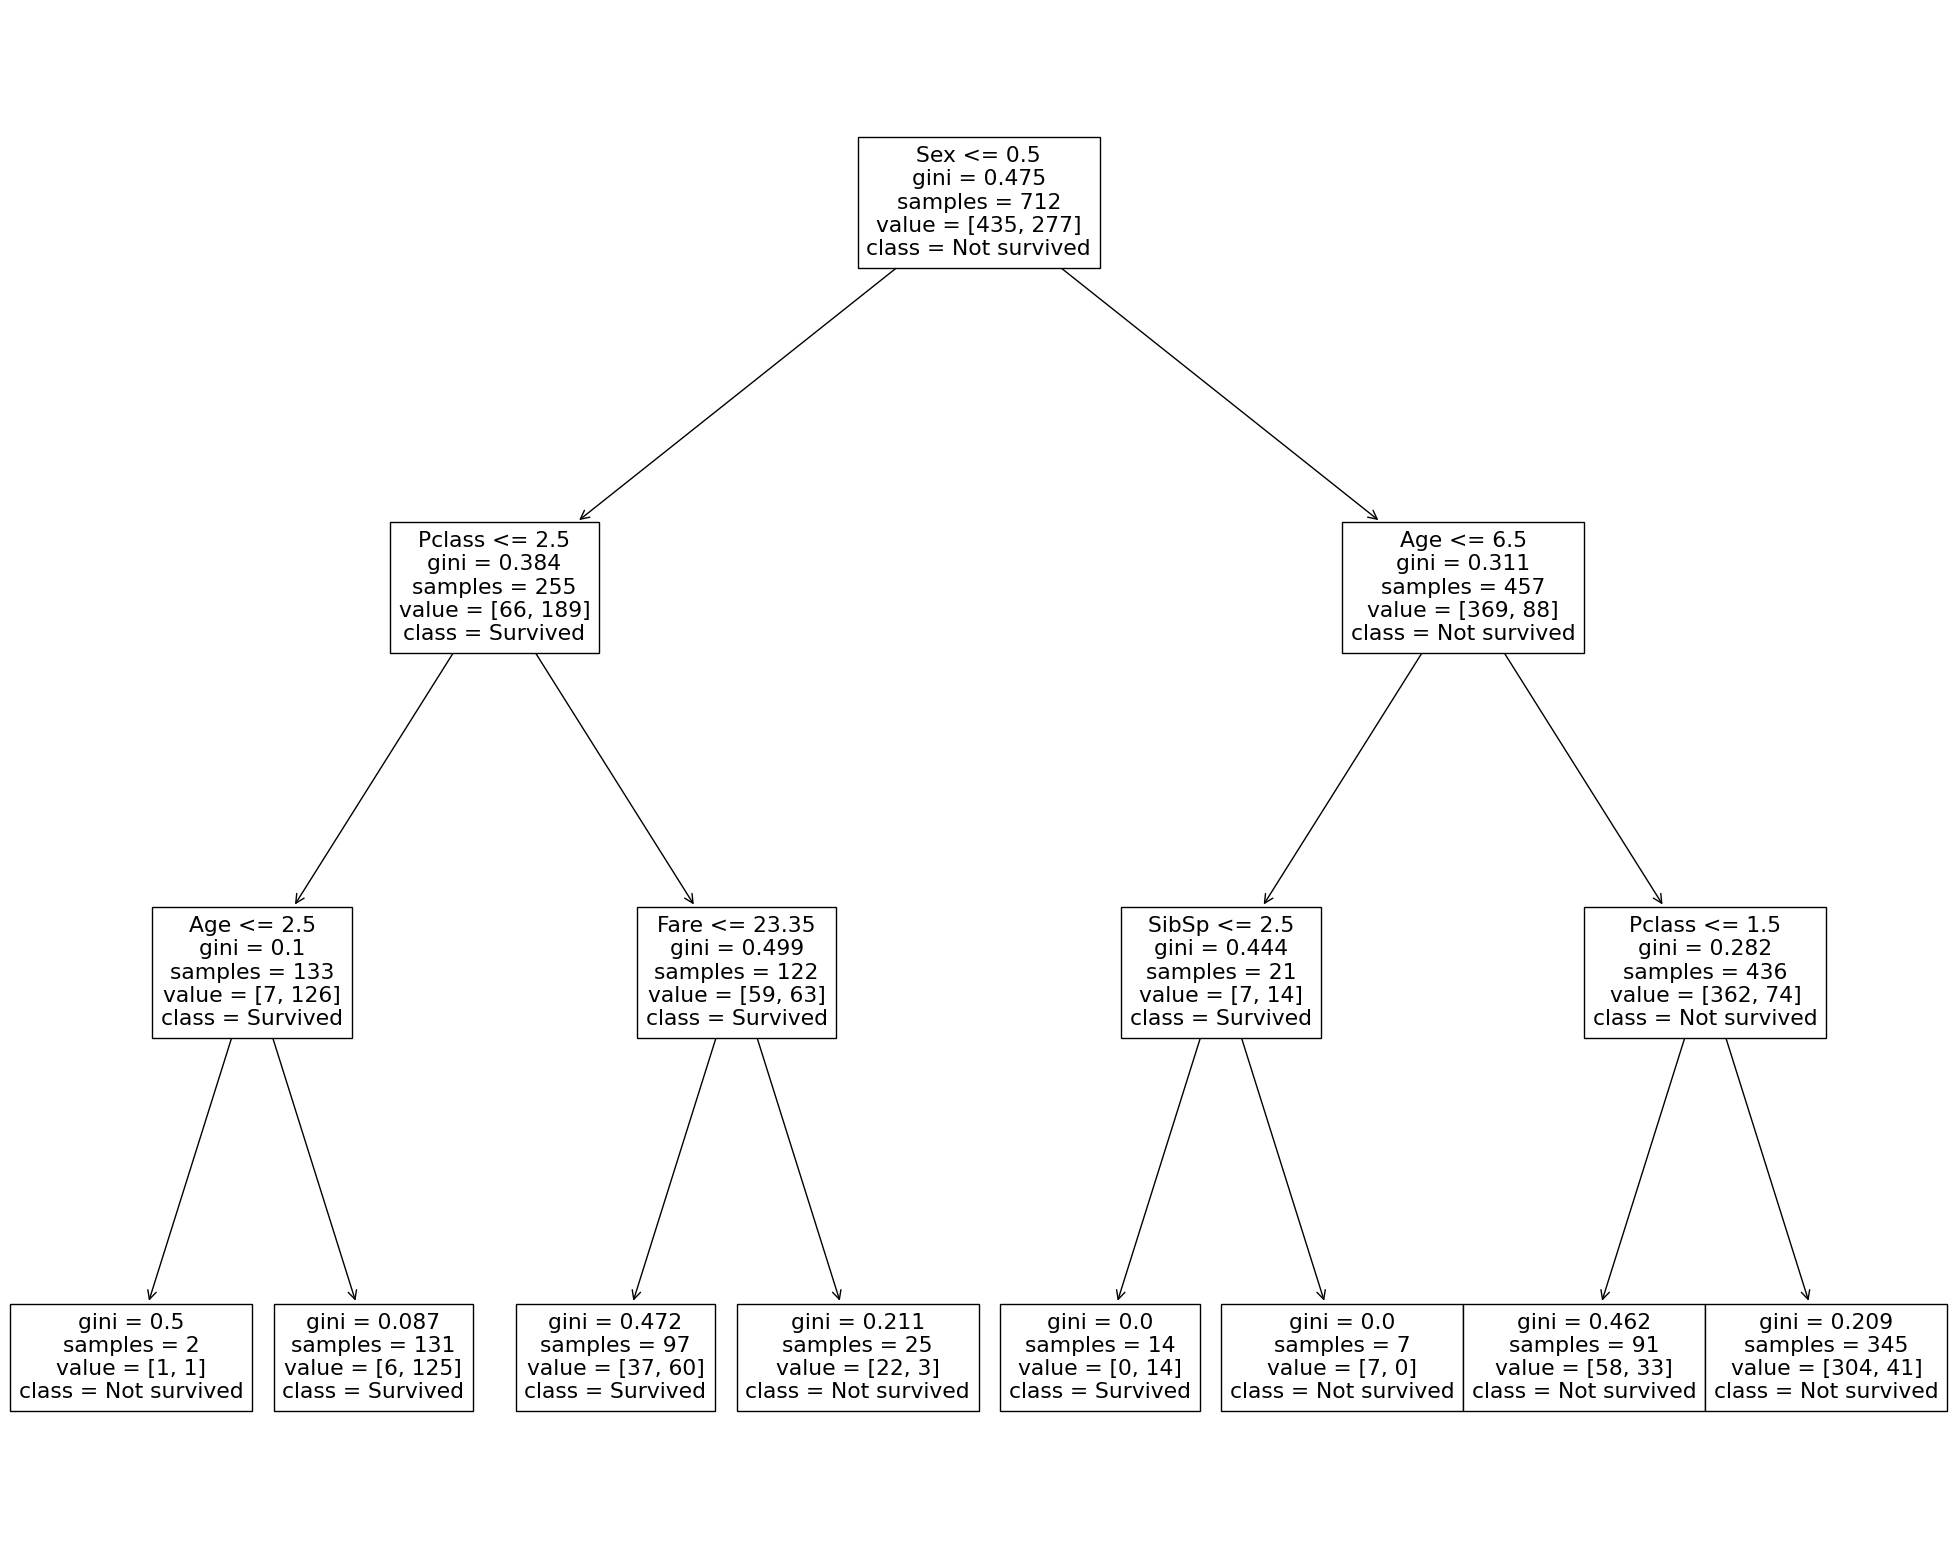

In [35]:
# Graphic
import matplotlib.pyplot as plt, seaborn as sns
from sklearn import tree
fig = plt.figure(figsize=(25, 20))
tree.plot_tree(dt_model, feature_names=list(X.columns), class_names=['Not survived', 'Survived'])
plt.show()